In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Downloads/bank.csv", sep=';')
data_full = pd.read_csv("Downloads/bank-full.csv", sep=';')

In [3]:
data.shape

(4521, 17)

In [4]:
data_full.shape

(45211, 17)

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
data_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
for i in data_full.select_dtypes('object').columns:
    print(i)
    print(np.unique(data_full[i]))

job
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital
['divorced' 'married' 'single']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'telephone' 'unknown']
month
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome
['failure' 'other' 'success' 'unknown']
y
['no' 'yes']


In [9]:
data_full['age'].head()

0    58
1    44
2    33
3    47
4    33
Name: age, dtype: int64

In [10]:
print('Максимальный возраст клиента: %d лет.' %data_full['age'].max())
print('Минимальный возраст клиента: %d лет.' %data_full['age'].min())

Максимальный возраст клиента: 95 лет.
Минимальный возраст клиента: 18 лет.


In [11]:
data_full['age'][:10]

0    58
1    44
2    33
3    47
4    33
5    35
6    28
7    42
8    58
9    43
Name: age, dtype: int64

In [12]:
print('Средний возраст клиента: %d лет.' %data_full['age'].mean())
print('Медианный возраст клиента: %d лет.' %data_full['age'].median())

Средний возраст клиента: 40 лет.
Медианный возраст клиента: 39 лет.


In [13]:
bins = pd.cut(data_full['age'],20).value_counts().sort_index()
bins

(17.923, 21.85]     176
(21.85, 25.7]      1160
(25.7, 29.55]      3937
(29.55, 33.4]      7810
(33.4, 37.25]      7326
(37.25, 41.1]      5599
(41.1, 44.95]      3539
(44.95, 48.8]      4476
(48.8, 52.65]      3780
(52.65, 56.5]      3286
(56.5, 60.35]      2934
(60.35, 64.2]       378
(64.2, 68.05]       212
(68.05, 71.9]       165
(71.9, 75.75]       172
(75.75, 79.6]       131
(79.6, 83.45]        89
(83.45, 87.3]        27
(87.3, 91.15]         7
(91.15, 95.0]         7
Name: age, dtype: int64

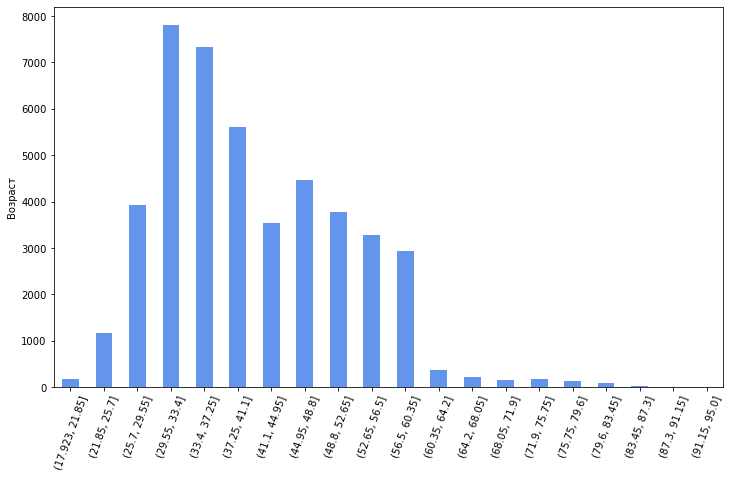

In [14]:
bins.plot(kind='bar', color='cornflowerblue', figsize=(12,7))
plt.ylabel('Кол-во клиентов')
plt.ylabel('Возраст')
plt.xticks(rotation=70)
plt.show()

In [15]:
data_full.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [16]:
round(data_full.education.value_counts(normalize=True)*100,2)

secondary    51.32
tertiary     29.42
primary      15.15
unknown       4.11
Name: education, dtype: float64

In [17]:
pd.crosstab(data_full['education'],data_full['marital'], normalize=True)*100

marital,divorced,married,single
education,,,
primary,1.663312,11.603371,1.886709
secondary,6.226361,30.457190,14.635819
tertiary,3.253633,15.567008,10.599190
unknown,0.373803,2.565747,1.167857


In [18]:
data_full.groupby('job')['balance'].sum().sort_values(ascending=False)

job
management       16680288
blue-collar      10499141
technician        9516246
admin.            5873423
retired           4492263
services          4141904
self-employed     2602146
entrepreneur      2262426
unemployed        1982835
housemaid         1726570
student           1302001
unknown            510439
Name: balance, dtype: int64

In [19]:
data_full.groupby('job')['balance'].mean().sort_values(ascending=False)

job
retired          1984.215106
unknown          1772.357639
management       1763.616832
self-employed    1647.970868
unemployed       1521.745971
entrepreneur     1521.470074
housemaid        1392.395161
student          1388.060768
technician       1252.632092
admin.           1135.838909
blue-collar      1078.826654
services          997.088108
Name: balance, dtype: float64

In [21]:
data_full.groupby(['job', 'marital'])['balance'].mean().unstack()

marital,divorced,married,single
job,,,
admin.,878.333333,1281.409580,1020.739005
blue-collar,820.806667,1113.165901,1056.105263
entrepreneur,1155.983240,1643.387850,1248.235294
housemaid,1573.222826,1248.173246,2074.743056
management,1618.073807,1828.159444,1700.219545
retired,1507.835294,2140.098787,1360.388889
self-employed,2426.350000,1644.948640,1410.365471
services,834.304189,1088.847528,887.324708
student,1101.000000,1164.796296,1403.753986


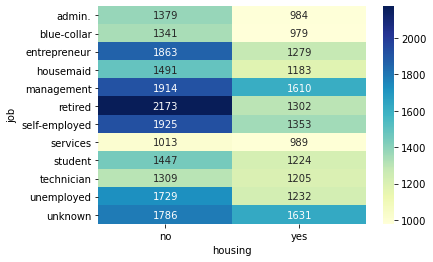

In [22]:
sns.heatmap(data_full.groupby(['job', 'housing'])['balance'].mean().unstack(), annot=True, fmt='.0f', cmap="YlGnBu")
plt.show()

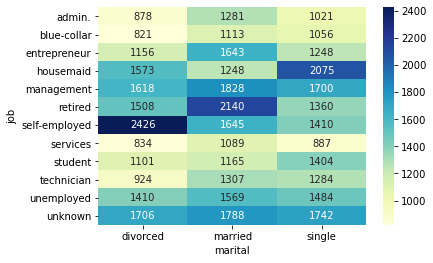

In [23]:
sns.heatmap(data_full.groupby(['job', 'marital'])['balance'].mean().unstack(), annot=True, fmt='.0f', cmap="YlGnBu")
plt.show()

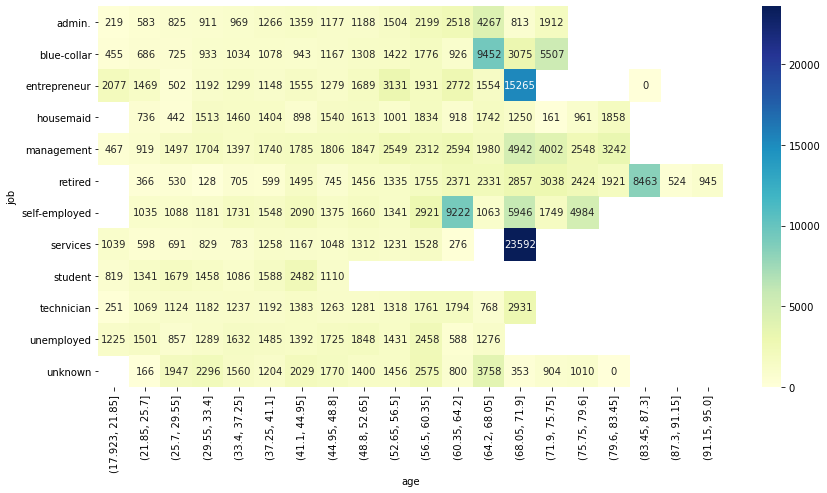

In [27]:
plt.figure(figsize=(14, 7))
sns.heatmap(data_full.groupby(['job', pd.cut(data_full['age'],20) ])['balance'].mean().unstack(), \
            annot=True, fmt='.0f', cmap="YlGnBu")
plt.show()

In [44]:
data_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [48]:
data_full['duration_min'] = round(data_full['duration']/60,0).astype(int)

data_full['duration_min'].unique()

array([ 4,  3,  1,  2,  6,  9,  5, 28, 10,  0, 25, 13, 30, 14,  7, 17, 24,
       23, 11, 34, 18,  8, 12, 16, 20, 27, 15, 22, 32, 19, 26, 36, 21, 35,
       41, 29, 31, 56, 37, 51, 52, 38, 33, 44, 65, 46, 53, 42, 45, 57, 55,
       40, 54, 82, 50, 39, 48, 63])

In [49]:
data_full['y'] = data_full['y'].apply(lambda x: 1 if x=='yes' else 0)

In [50]:
pd.crosstab(data_full['y'], data_full['loan'], margins=True, normalize=True)*100

loan,no,yes,All
y,,,
0,73.349406,14.952113,88.30152
1,10.627945,1.070536,11.69848
All,83.977351,16.022649,100.00000


In [51]:
data_full['duration_min'].unique()

array([ 4,  3,  1,  2,  6,  9,  5, 28, 10,  0, 25, 13, 30, 14,  7, 17, 24,
       23, 11, 34, 18,  8, 12, 16, 20, 27, 15, 22, 32, 19, 26, 36, 21, 35,
       41, 29, 31, 56, 37, 51, 52, 38, 33, 44, 65, 46, 53, 42, 45, 57, 55,
       40, 54, 82, 50, 39, 48, 63])

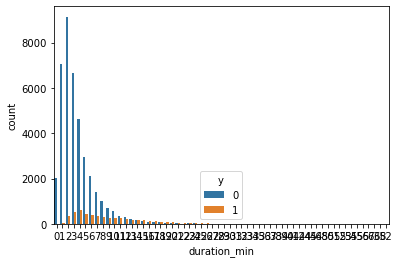

In [52]:
sns.countplot(x='duration_min', hue='y', data=data_full)
plt.show()

In [53]:
low=.05
high=.95 
quant_minutes = data_full['duration_min'].quantile([low,high])
pd.DataFrame(quant_minutes)

,duration_min
0.05,1.0
0.95,13.0


In [54]:
quant_minutes.values

array([ 1., 13.])

In [55]:
_min_boundary = quant_minutes.values[0]
_max_boundary = quant_minutes.values[1]

In [56]:
filtered_df = data_full[(data_full['duration_min'] > _min_boundary)&(data_full['duration_min'] < _max_boundary)]

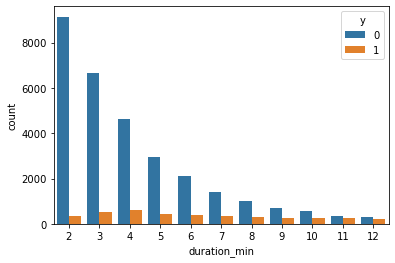

In [57]:
sns.countplot(x='duration_min', hue='y', data=filtered_df)
plt.show()